# Import Libraries

In [1]:
import os

from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

import sklearn
import sklearn.preprocessing as skl_preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import HDBSCAN as SKL_HDBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from pytorchtools import EarlyStopping

# from torch_utils import EarlyStopping

print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

2.0.1+cu118
True
1
0
NVIDIA GeForce RTX 3090


In [3]:
# input_root_path = "P:\SALMALIS Lab\Work Zone Dataset"
input_root_path = "E:\OneDrive - UBC\Work Zone\data"
# input_root_path = "C:\\Users\yegmo\OneDrive - UBC\Work Zone\data"
output_root_path = f"../cluster/{datetime.now().strftime('m%m-d%d_H%H-M%M')}"
os.makedirs(output_root_path, exist_ok=True)
print(output_root_path)

../cluster/m03-d15_H16-M12


# Load Dataset

In [4]:
# df = pd.read_csv(os.path.join(input_root_path, 'TravelTimeInfo\TravelTime_WZChars.csv'))
# df_traffic = pd.read_csv(os.path.join(input_root_path, 'TravelTimeInfo\TravelTime_HaveCellCoverage_April_1-10.csv'))
# df_volume = pd.DataFrame(df_traffic[['AssetNumber', 'Traffic:CalculatedAADT']].dropna(axis=0).groupby('AssetNumber').max()).reset_index().drop_duplicates()
# temp = pd.merge(left=df, right=df_volume, on=['AssetNumber'], how='left').dropna(axis=0)
# # temp.to_csv(os.path.join(input_root_path, 'TravelTimeInfo\TravelTime_WZChars_TrafficVolume.csv'))
# temp


In [10]:
# df = feather.read_feather(os.path.join(input_root_path, 'TravelTimeInfo\TravelTime_HaveCellCoverage.ftr'))
# df = pd.read_csv(os.path.join(input_root_path, 'TravelTimeInfo\TravelTime_WZChars.csv'))
df = pd.read_csv(os.path.join(input_root_path, 'TravelTimeInfo\TravelTime_WZChars_TrafficVolume.csv'))
df = df.drop(columns=df.columns[0:2]).drop_duplicates()
# df = df

# df = df[df['WZ_IsMinAprch'] == 0] #uncomment

df.nunique()
# df

AssetNumber                  38
UnderConstructionTime       408
BaselineTime                 29
DelayTime                   423
SegmentLength                21
TravelDirect                  2
Spread                        4
TrafficImpact                 2
RoadType                      2
TrafficControlSetup           1
CreatedDate:Weekday           6
CreatedDate:DayOfYear        57
CreatedDate:Year              1
CreatedDate:Month             4
CreatedDate:Day              29
CreatedDate:Hour             24
CreatedDate:MinuteInDay    1087
CreatedDate:Season            2
Weather:Temp                241
Weather:Precip               22
Weather:WindSpd              26
WZ_Hwy                        1
PostedSpd                     1
WZ_IsBidirectional            2
WZ_ConstSignSpdLimDist        2
WZ_TransLenStart              2
WZ_2ndTransLenStart           3
WZ_Length                     6
WZ_TransLenEnd                4
WZ_SpdLim                     2
WZ_TransSpd                   1
WZ_IsPre

In [33]:
df[df['RoadType'] == 'Multi-Lane Undivided Roadways']
# df['RoadType'].unique()

,AssetNumber,UnderConstructionTime,BaselineTime,DelayTime,SegmentLength,TravelDirect,Spread,TrafficImpact,RoadType,TrafficControlSetup,...,WZ_OrigLaneCount,WZ_IsOrigIDivided,WZ_NewLaneCount,WZ_ClosedLaneCount,WZ_IsMinAprch,WZ_BarrelSpace,WZ_CalculatedAADT,CreatedDate:Season_Code,TravelDirect_Code,Traffic:CalculatedAADT
40717,52875362848,2.43,2.23,0.20,3.66,SB,Spread 3C,High,Multi-Lane Undivided Roadways,SLAT,...,1,0,1,0,0,0,3308.55,2,0,471.975
40718,52875362848,2.43,2.23,0.20,3.66,SB,Spread 3C,High,Multi-Lane Undivided Roadways,SLAT,...,1,0,1,0,0,0,3308.55,2,0,471.975
40719,52875362848,2.43,2.23,0.20,3.66,SB,Spread 3C,High,Multi-Lane Undivided Roadways,SLAT,...,1,1,1,1,0,335,3308.55,2,0,471.975
40720,52875362848,2.40,2.23,0.17,3.66,SB,Spread 3C,High,Multi-Lane Undivided Roadways,SLAT,...,1,0,1,0,0,0,3308.55,2,0,471.975
40721,52875362848,2.40,2.23,0.17,3.66,SB,Spread 3C,High,Multi-Lane Undivided Roadways,SLAT,...,1,0,1,0,0,0,3308.55,2,0,471.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220902,92919797920,1.82,2.18,0.00,3.25,NB,Spread 3C,High,Multi-Lane Undivided Roadways,SLAT,...,1,0,1,0,0,0,3308.55,2,1,441.350
220903,92919797920,1.82,2.18,0.00,3.25,NB,Spread 3C,High,Multi-Lane Undivided Roadways,SLAT,...,1,1,1,1,0,515,3308.55,2,1,441.350
220904,92919797920,1.82,2.18,0.00,3.25,NB,Spread 3C,High,Multi-Lane Undivided Roadways,SLAT,...,1,0,1,0,0,0,3308.55,2,1,441.350
220905,92919797920,1.82,2.18,0.00,3.25,NB,Spread 3C,High,Multi-Lane Undivided Roadways,SLAT,...,1,0,1,0,0,0,3308.55,2,1,441.350


## Select Columns

In [18]:
drop_cols = set(df.columns[df.nunique() <= 1])
interest_cols = {
    'AssetNumber',

    'UnderConstructionTime', 'BaselineTime', 'DelayTime',

    'CreatedDate:Weekday', 'CreatedDate:Day',
    'CreatedDate:Hour',  # 'CreatedDate:MinuteInDay',
    'CreatedDate:DayOfYear',  #'CreatedDate:Month', 
    'CreatedDate:Season',

    'Weather:Temp', 'Weather:Precip', 'Weather:WindSpd',

    'TravelDirect',
    #'TrafficImpact', 'TrafficControlSetup',
    'Spread', 'RoadType',
    # 'Spread:Spread3B_onehot', 'Spread:Spread3C_onehot', 'Spread:Spread4A_onehot', 'Spread:Spread4B_onehot', 'Spread:Reactivation_onehot', 'Spread:Spread5B_onehot',
    # 'RoadType:Two-Lane,Two-WayRoadways(>70km/h)_onehot', 'RoadType:Multi-LaneUndivided_onehot',

    'WZ_IsMinAprch',  'WZ_IsBidirectional', 'WZ_IsPrepStop', 'WZ_IsOrigIDivided', 

    'SegmentLength',
    'PostedSpd', 'WZ_TransSpd',  'WZ_SpdLim',
    'WZ_TransLenStart', 'WZ_2ndTransLenStart', 'WZ_TransLenEnd',
    'WZ_Length', 'WZ_ConstSignSpdLimDist', 'WZ_ThxSignSpdLimDist',
    'WZ_OrigLaneCount',  'WZ_NewLaneCount', 'WZ_ClosedLaneCount',
    'WZ_BarrelSpace',
    'WZ_CalculatedAADT', 'Traffic:CalculatedAADT',
}

selected_cols = list(interest_cols - drop_cols)

df_selected = df[selected_cols].copy()
df_selected['WZ_CombTransLenStart'] = df_selected['WZ_ConstSignSpdLimDist'] + df_selected['WZ_TransLenStart']
drop_cols = ['WZ_ConstSignSpdLimDist', 'WZ_TransLenStart']
df_selected = df_selected.drop(columns=drop_cols)
df_selected

,WZ_IsBidirectional,Spread,CreatedDate:Hour,AssetNumber,WZ_IsOrigIDivided,WZ_IsMinAprch,SegmentLength,WZ_SpdLim,Weather:Precip,TravelDirect,...,CreatedDate:Weekday,BaselineTime,CreatedDate:DayOfYear,CreatedDate:Day,WZ_TransLenEnd,UnderConstructionTime,WZ_ClosedLaneCount,WZ_CalculatedAADT,CreatedDate:Season,WZ_CombTransLenStart
0,1,Spread 3B,17,49831911074,1,0,3.36,50,0.0,SB,...,1,2.13,123,3,1050,2.20,1,4017.30,Spring,750
1,1,Spread 3B,17,49831911074,1,0,3.36,70,0.0,SB,...,1,2.13,123,3,750,2.20,1,4017.30,Spring,300
2,1,Spread 3B,17,49831911074,1,0,3.36,50,0.0,SB,...,1,2.13,123,3,1050,2.20,1,4017.30,Spring,750
3,1,Spread 3B,17,49831911074,1,0,3.36,70,0.0,SB,...,1,2.13,123,3,750,2.20,1,4017.30,Spring,300
4,1,Spread 3B,17,49831911074,1,0,3.36,50,0.0,SB,...,1,2.13,123,3,1050,2.20,1,4017.30,Spring,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251480,0,Spread 4B,10,35996382912,0,1,3.08,50,0.0,SB,...,5,2.25,92,2,900,3.15,0,2958.16,Spring,600
251481,0,Spread 4B,10,35996382912,0,1,3.08,70,0.0,SB,...,5,2.25,92,2,450,3.15,0,3015.60,Spring,300
251482,0,Spread 4B,10,35996382912,0,1,3.08,70,0.0,SB,...,5,2.25,92,2,450,3.20,0,2958.16,Spring,300
251483,0,Spread 4B,10,35996382912,0,1,3.08,50,0.0,SB,...,5,2.25,92,2,900,3.20,0,2958.16,Spring,600


In [19]:
df_selected.nunique()


WZ_IsBidirectional          2
Spread                      4
CreatedDate:Hour           24
AssetNumber                38
WZ_IsOrigIDivided           2
WZ_IsMinAprch               2
SegmentLength              21
WZ_SpdLim                   2
Weather:Precip             22
TravelDirect                2
RoadType                    2
Traffic:CalculatedAADT      8
WZ_BarrelSpace              4
Weather:WindSpd            26
DelayTime                 423
WZ_Length                   6
WZ_2ndTransLenStart         3
Weather:Temp              241
CreatedDate:Weekday         6
BaselineTime               29
CreatedDate:DayOfYear      57
CreatedDate:Day            29
WZ_TransLenEnd              4
UnderConstructionTime     408
WZ_ClosedLaneCount          2
WZ_CalculatedAADT           7
CreatedDate:Season          2
WZ_CombTransLenStart        3
dtype: int64

## Preprocess

### Scale

In [20]:
df_scaled = df_selected.drop(['AssetNumber'], axis=1).select_dtypes(include=np.number)
num_cols = df_scaled.columns 

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(scaled_data, columns=df_scaled.columns)

# df_scaled['WZ_IsMinAprch'] = df_selected['WZ_IsMinAprch']
df_scaled['AssetNumber'] = df_selected['AssetNumber']
# df_scaled['TravelDirect_Code'] = df_selected['TravelDirect_Code']
# df_scaled['WZ_IsMinAprch'] = df_selected['WZ_IsMinAprch']

df_scaled

,WZ_IsBidirectional,CreatedDate:Hour,WZ_IsOrigIDivided,WZ_IsMinAprch,SegmentLength,WZ_SpdLim,Weather:Precip,Traffic:CalculatedAADT,WZ_BarrelSpace,Weather:WindSpd,...,CreatedDate:Weekday,BaselineTime,CreatedDate:DayOfYear,CreatedDate:Day,WZ_TransLenEnd,UnderConstructionTime,WZ_ClosedLaneCount,WZ_CalculatedAADT,WZ_CombTransLenStart,AssetNumber
0,1.463245,1.579937,1.461496,-0.195960,-0.067786,-1.44467,-0.302481,0.678602,2.919991,-0.656149,...,-0.676920,-0.093791,0.088962,-1.203398,2.787676,-0.306586,1.463245,2.102584,1.585772,4.983191e+10
1,1.463245,1.579937,1.461496,-0.195960,-0.067786,0.69220,-0.302481,0.678602,2.919991,-0.656149,...,-0.676920,-0.093791,0.088962,-1.203398,1.050056,-0.306586,1.463245,2.102584,-0.681235,4.983191e+10
2,1.463245,1.579937,1.461496,-0.195960,-0.067786,-1.44467,-0.302481,0.678602,2.919991,-0.656149,...,-0.676920,-0.093791,0.088962,-1.203398,2.787676,-0.306586,1.463245,2.102584,1.585772,4.983191e+10
3,1.463245,1.579937,1.461496,-0.195960,-0.067786,0.69220,-0.302481,0.678602,2.919991,-0.656149,...,-0.676920,-0.093791,0.088962,-1.203398,1.050056,-0.306586,1.463245,2.102584,-0.681235,4.983191e+10
4,1.463245,1.579937,1.461496,-0.195960,-0.067786,-1.44467,-0.302481,0.678602,2.919991,-0.656149,...,-0.676920,-0.093791,0.088962,-1.203398,2.787676,-0.306586,1.463245,2.102584,1.585772,4.983191e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250236,-0.683412,-0.553830,-0.684230,5.103076,-0.465502,-1.44467,-0.302481,-1.929998,-0.583844,1.063579,...,1.815091,0.155459,-1.324125,-1.296241,1.918866,1.188708,-0.683412,-1.244895,0.830103,7.174163e+10
250237,-0.683412,-0.553830,-0.684230,5.103076,-0.465502,0.69220,-0.302481,-1.929998,-0.583844,1.063579,...,1.815091,0.155459,-1.324125,-1.296241,-0.687563,1.188708,-0.683412,-1.063352,-0.681235,7.174163e+10
250238,-0.683412,-0.553830,-0.684230,5.103076,-0.465502,0.69220,-0.302481,-1.929998,-0.583844,1.063579,...,1.815091,0.155459,-1.324125,-1.296241,-0.687563,1.267408,-0.683412,-1.244895,-0.681235,7.174163e+10
250239,-0.683412,-0.553830,-0.684230,5.103076,-0.465502,-1.44467,-0.302481,-1.929998,-0.583844,1.063579,...,1.815091,0.155459,-1.324125,-1.296241,1.918866,1.267408,-0.683412,-1.244895,0.830103,7.174163e+10


### Factorize

In [21]:
cat_cols = {'Spread', 'RoadType', 'TravelDirect', 'CreatedDate:Season'}

cat_codes = {}
for col in cat_cols:
    df_selected[col + '_code'], uniq_val = pd.factorize(df_selected[col])
    df_scaled[col + '_code'] = df_selected[col + '_code']
    cat_codes[col] = uniq_val

cat_codes

{'TravelDirect': Index(['SB', 'NB'], dtype='object'),
 'RoadType': Index(['Two-Lane, Two-Way Roadways (>70 km/h)', 'Multi-Lane Undivided Roadways'], dtype='object'),
 'Spread': Index(['Spread 3B', 'Spread 3C', 'Spread 4A', 'Spread 4B'], dtype='object'),
 'CreatedDate:Season': Index(['Spring', 'Summer'], dtype='object')}

# Clustering

In [22]:
def cluster_time(df_processed, n_clusters=3, no_show_cols=[], file_name=None):
    color_map = {
        "Low": "green",
        "Medium": "blue",
        "High": "red"}
    
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init=10, tol=1e-04, random_state=42)
    kmeans.fit(df_processed[['DelayTime']].values)
    df_processed['Cluster'] = kmeans.labels_
    # df_processed['Cluster'] = kmeans.fit_predict(scaled_data)

    cluster_means = df_processed.groupby('Cluster')['DelayTime'].mean().reset_index()
    cluster_means = cluster_means.sort_values(by='DelayTime').reset_index(drop=True)
    cluster_means['ClusterLabel'] = list(color_map.keys())
    # cluster_means['ClusterLabel'] = pd.Categorical(cluster_means['Cluster'].apply(lambda x: labels[x]))
    df_processed = pd.merge(df_processed, cluster_means[['Cluster', 'ClusterLabel']], on='Cluster').drop(['Cluster'], axis=1)

    # df_plot = df_processed.drop("DelayTime", axis=1)
    # df_plot["WZ_CalculatedAADT"] /= 100
    # polar = df_plot.groupby("ClusterLabel").mean().reset_index()
    # polar = pd.melt(polar, id_vars="ClusterLabel", var_name='Variable', value_name='Value')
    # fig_polar = px.line_polar(polar, r="Value", theta="Variable", color="ClusterLabel", line_close=True, height=800, width=1400)
    scatter_data = df_processed.drop(columns=no_show_cols)
    scatter_data = scatter_data.groupby("ClusterLabel").mean().reset_index()
    scatter_data = pd.melt(scatter_data, id_vars=["ClusterLabel"], var_name='Variable', value_name='Value')
    
    scaled_df = scatter_data[scatter_data['Variable'].str.endswith('_scaled')].copy()
    scaled_df.rename(columns={'Value': 'ScaledValue'}, inplace=True)
    scaled_df['Variable'] = scaled_df['Variable'].str.replace('_scaled', '')
    
    scatter_data = scatter_data[~scatter_data['Variable'].str.endswith('_scaled')].copy()
    scatter_data = pd.merge(scatter_data, scaled_df, on=['ClusterLabel', 'Variable'], how='left')
    scatter_data['ScaledValue'].fillna(scatter_data['Value'], inplace=True)
    scatter_data['Value'] = scatter_data['Value'].round(2)
    
    fig_scatter = px.scatter(scatter_data,
                             x="Variable", y="ScaledValue",
                             text="Value", hover_name="Variable", hover_data=["Value"],
                             symbol="ClusterLabel", opacity=0.8,
                             color="ClusterLabel", color_discrete_map=color_map, 
                             height=800, width=1000)
    fig_scatter.update_traces(marker=dict(size=17, line=dict(width=2, color='Black')),
                              textfont=dict(color='Crimson'), textposition='top center')
    fig_scatter.update_layout(legend=dict(yanchor="top", y=0.99,
                                          xanchor="left", x=0.01),
                              yaxis=dict(showticklabels=False),
                              font=dict(size=15, color="Black"))
        
    fig_polar = px.line_polar(scatter_data, 
                              r="ScaledValue", theta="Variable", 
                              hover_name="Variable", hover_data=["Value"], #text="Value",
                              symbol="ClusterLabel", 
                              color="ClusterLabel",color_discrete_map=color_map, 
                              line_close=True,
                              height=900, width=1100)
    fig_polar.update_layout(polar=dict(radialaxis=dict(showticklabels=False)),
                            legend=dict(yanchor="top", y=0.99,
                                        xanchor="left", x=0.01),
                            font=dict(size=16, color="Black"))
    fig_polar.update_traces(marker={'size': 10})
    
    pie = df_processed.groupby('ClusterLabel').size().reset_index()
    pie.columns = ['ClusterLabel', 'value']
    fig_pie = px.pie(pie, values='value', names='ClusterLabel',
                     color="ClusterLabel", color_discrete_map=color_map,
                     height=700, width=700)
    fig_pie.update_layout(font=dict(size=18, color="Black"))
    # fig_pie.update_traces(text=pie['value'], selector=dict(type='pie'))
    print(cluster_means)
    fig_scatter.show()
    fig_polar.show()
    fig_pie.show()

    if file_name is not None:
        fig_polar.write_html(os.path.join(output_root_path, file_name + "_polar.html"))
        fig_scatter.write_html(os.path.join(output_root_path, file_name + "_scatter.html"))
        # fig_polar.write_image(os.path.join(output_root_path, file_name + "_polar.png"))
        # fig_scatter.write_image(os.path.join(output_root_path, file_name + "_scatter.png"))
        
    return df_processed

In [25]:
df_all = pd.merge(df_selected, df_scaled[num_cols], left_index=True, right_index=True, suffixes=('', '_scaled'))
df_clustered = cluster_time(df_all.drop(columns=list(cat_cols) + ["AssetNumber"]), file_name="selected_justWZ",
                            no_show_cols=["Spread_code", "RoadType_code", "TravelDirect_code", 
                                          "DelayTime", "BaselineTime", "UnderConstructionTime",
                                          "Traffic:CalculatedAADT", "WZ_CalculatedAADT",
                                          "CreatedDate:DayOfYear", "CreatedDate:Day", "CreatedDate:Weekday", "CreatedDate:Season_code",
                                          "Weather:Temp", "Weather:Precip", "Weather:WindSpd",
                                          "WZ_IsMinAprch", "WZ_IsBidirectional", "WZ_IsPrepStop", "WZ_IsOrigIDivided",
                                          ])
df_clustered.groupby("ClusterLabel").describe()
# df_clustered = cluster_time(df_selected.drop(columns=list(cat_cols) + ["AssetNumber"]), file_name="selected_NOTScaled")
# df_clustered.groupby("ClusterLabel").describe()

# df_clustered_sc = cluster_time(df_scaled.drop(columns="AssetNumber"), file_name="selected_Scaled")
# df_clustered_sc.groupby("ClusterLabel").describe()

   Cluster  DelayTime ClusterLabel
0        1   0.098573          Low
1        0   0.572356       Medium
2        2   1.617103         High


WZ_IsBidirectional                                               \
                          count      mean       std  min  25%  50%  75%  max   
ClusterLabel                                                                   
High                     7455.0  0.084373  0.277965  0.0  0.0  0.0  0.0  1.0   
Low                    191682.0  0.353304  0.477997  0.0  0.0  0.0  1.0  1.0   
Medium                  49860.0  0.226955  0.418868  0.0  0.0  0.0  0.0  1.0   

             CreatedDate:Hour             ... WZ_CalculatedAADT_scaled  \
                        count       mean  ...                      75%   
ClusterLabel                              ...                            
High                   7455.0  11.629242  ...                -0.137465   
Low                  191682.0  11.747806  ...                -0.137465   
Medium                49860.0  12.128039  ...                -0.137465   

                       WZ_CombTransLenStart_scaled                      \
                   max                       count      mean       std   
ClusterLabel                                                             
High          5.135649                      7455.0  0.184516  0.821057   
Low           5.135649                    191682.0 -0.012462  1.020324   
Medium        5.135649                     49860.0  0.036681  0.947007   

                                                                
                   min       25%       50%       75%       max  
ClusterLabel                                                    
High         -0.681235 -0.681235  0.830103  0.830103  1.585772  
Low          -0.681235 -0.681235 -0.681235  1.585772  1.585772  
Medium       -0.681235 -0.681235 -0.681235  0.830103  1.585772  

[3 rows x 400 columns]

## DBSCAN

In [42]:
scaled_data

array([[ 1.58036045,  0.67663514, -0.68001547, ..., -0.32016822,
         2.92758535,  1.59109241],
       [ 1.58036045,  0.67663514, -0.68001547, ..., -0.32016822,
         2.92758535, -0.67884291],
       [ 1.58036045,  0.67663514, -0.68001547, ..., -0.32016822,
         2.92758535,  1.59109241],
       ...,
       [-0.55479515, -1.85952587,  1.80535964, ..., -0.32016822,
        -0.58195919, -0.67884291],
       [-0.55479515, -1.85952587,  1.80535964, ...,  1.97921509,
        -0.58195919,  0.8344473 ],
       [-0.55479515, -1.85952587,  1.80535964, ..., -0.32016822,
        -0.58195919, -0.67884291]])

In [ ]:
min_pts = 2 * scaled_data.sscaled_datascaled_datahape[1]
dbscan = DBSCAN(eps=0.14, min_samples=min_pts)

dbscan.fit(scaled_data)

df_scaled['Cluster'] = dbscan.labels_

# Find optimal eps using the knee method
neighbors = NearestNeighbors(n_neighbors=min_pts)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]

first_derivative = np.gradient(distances)
second_derivative = np.gradient(first_derivative)
max_curvature_index = np.argmax(second_derivative)
max_curvature_value = second_derivative[max_curvature_index]
print(f"Maximum curvature occurs at index {max_curvature_index} with value {max_curvature_value}")

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(distances)), y=distances, mode='lines', name='Distances'))
fig.update_layout(
    title='Knee/Elbow Method for Optimal Eps',
    xaxis=dict(title='Data Point'),
    yaxis=dict(title='Distance to Nearest Neighbor'),
    showlegend=True,
    width=800, height=500
)
fig.show()

polar = df_scaled.groupby("Cluster").mean().reset_index()
polar = pd.melt(polar, id_vars=["Cluster"])
fig2 = px.line_polar(polar, r="value", theta="variable", color="Cluster", line_close=True, height=800, width=1400)
fig2.show()
# fig.update_layout(
#     title="DBSCAN Clustering Results",
#     xaxis=dict(title="Data Point"),
#     yaxis=dict(title='Cluster Label', showgrid=False),
#     width=800, height=500
# )

## HDBSCAN

In [ ]:
# from hdbscan import HDBSCAN

hdbscan = SKL_HDBSCAN(min_cluster_size=min_pts)
hdbscan.fit(scaled_data)

df_scaled['Cluster'] = hdbscan.labels_

polar = df_scaled.groupby("Cluster").mean().reset_index()
polar = pd.melt(polar, id_vars=["Cluster"])
fig2 = px.line_polar(polar, r="value", theta="variable", color="Cluster", line_close=True, height=800, width=1400)
fig2.show()
# fig.update_layout(
#     title="DBSCAN Clustering Results",
#     xaxis=dict(title="Data Point"),
#     yaxis=dict(title='Cluster Label', showgrid=False),
#     width=800, height=500
# )

In [ ]:
param_dist = {
    'min_samples': [10, 30, 50, 60, 100],
    'min_cluster_size': [100, 200, 300, 400, 500, 600],
    'cluster_selection_method': ['eom', 'leaf'],
    'metric': ['euclidean', 'manhattan']
}

## K-Means

In [ ]:
alpha_k = 0.02
upper_bound = 20
inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()

inertia = []
scaled_inertia = []

for k in range(2, upper_bound):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, tol=1e-04, random_state=42)
    kmeans.fit(scaled_data)

    inertia.append(kmeans.inertia_)
    scaled_inertia.append(kmeans.inertia_ / inertia_o + alpha_k * k)

scaled_inertia_trace = go.Scatter(x=np.arange(1, upper_bound), y=scaled_inertia, name='Scaled Inertia', yaxis='y1')
regular_inertia_trace = go.Scatter(x=np.arange(1, upper_bound), y=inertia, name='Regular Inertia', yaxis='y2')

fig = go.Figure(data=[scaled_inertia_trace, regular_inertia_trace])

fig.update_layout(
    title="Inertia and Silhouette Score vs Cluster Number",
    xaxis=dict(range=[0, upper_bound], title="Cluster Number"),
    yaxis=dict(title='Scaled Inertia', side='left', showgrid=False),
    yaxis2=dict(title='Regular Inertia', side='right', overlaying='y', showgrid=False),
    width=800, height=500
)

In [ ]:
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init=10, tol=1e-04, random_state=42)
kmeans.fit(scaled_data)

# df_selected['Cluster'] = kmeans.fit_predict(scaled_data)
df_scaled = pd.DataFrame(scaled_data, columns=df_selected.drop("AssetNumber", axis=1).columns)
df_scaled['Cluster'] = kmeans.labels_

# polar = df_selected.drop('AssetNumber', axis=1).groupby("Cluster").mean().reset_index()
polar = df_scaled.groupby("Cluster").mean().reset_index()
polar = pd.melt(polar, id_vars=["Cluster"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="Cluster", line_close=True, height=800, width=1400)
fig4.show()

In [ ]:
pie = df_scaled.groupby('Cluster').size().reset_index()
pie.columns = ['Cluster', 'value']
px.pie(pie, values='value', names='Cluster', color=['blue', 'red', 'green', 'purple', 'orange'])

In [ ]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='AssetNumber', y='DelayTime', data=df, hue='Cluster', palette='viridis', legend='full')
plt.title('Clusters Visualized by AssetNumber and DelayTime')
plt.xlabel('AssetNumber')
plt.ylabel('DelayTime')
plt.show()

In [ ]:
selected_columns = ['AssetNumber', 'DelayTime']

# Select relevant columns
df_selected = df[selected_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected.drop('AssetNumber', axis=1))

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_d
ata)

plt.figure(figsize=(18, 6))
sns.scatterplot(x='AssetNumber', y='DelayTime', data=df, hue='Cluster', palette='viridis', legend='full')

# plt.xticks(df['AssetNumber'].unique()[::50])
plt.xticks(df['AssetNumber'].unique(), rotation=90, ha='right', fontsize=8,
           labels=[f'{int(x)}' for x in df['AssetNumber'].unique()])

plt.title('Clusters Visualized by AssetNumber and DelayTime')
plt.xlabel('AssetNumber')
plt.ylabel('DelayTime')
plt.show()

## Gaussian Mixture

In [ ]:
upper_bound = 20
bic = []  # Bayesian Information Criterion
aic = []  # Akaike Information Criterion

for k in range(2, upper_bound):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(scaled_data)

    bic.append(gmm.bic(scaled_data))
    aic.append(gmm.aic(scaled_data))

# Plotting BIC and AIC
bic_trace = go.Scatter(x=np.arange(2, upper_bound), y=bic, name='BIC', yaxis='y1')
aic_trace = go.Scatter(x=np.arange(2, upper_bound), y=aic, name='AIC', yaxis='y2')

fig = go.Figure(data=[bic_trace, aic_trace])

fig.update_layout(
    title="BIC and AIC vs Cluster Number for Gaussian Mixture Model",
    xaxis=dict(range=[2, upper_bound], title="Cluster Number"),
    yaxis=dict(title='BIC', side='left', showgrid=False),
    yaxis2=dict(title='AIC', side='right', overlaying='y', showgrid=False),
    width=800, height=500
)

                                             |          | [  0%]   00:00 -> (? left)


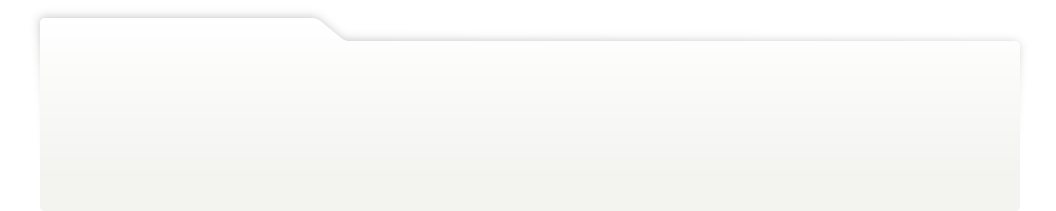
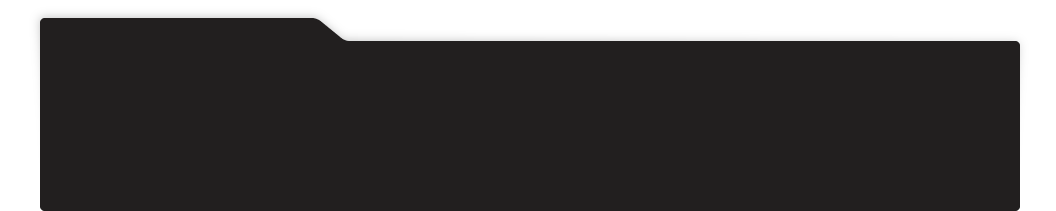
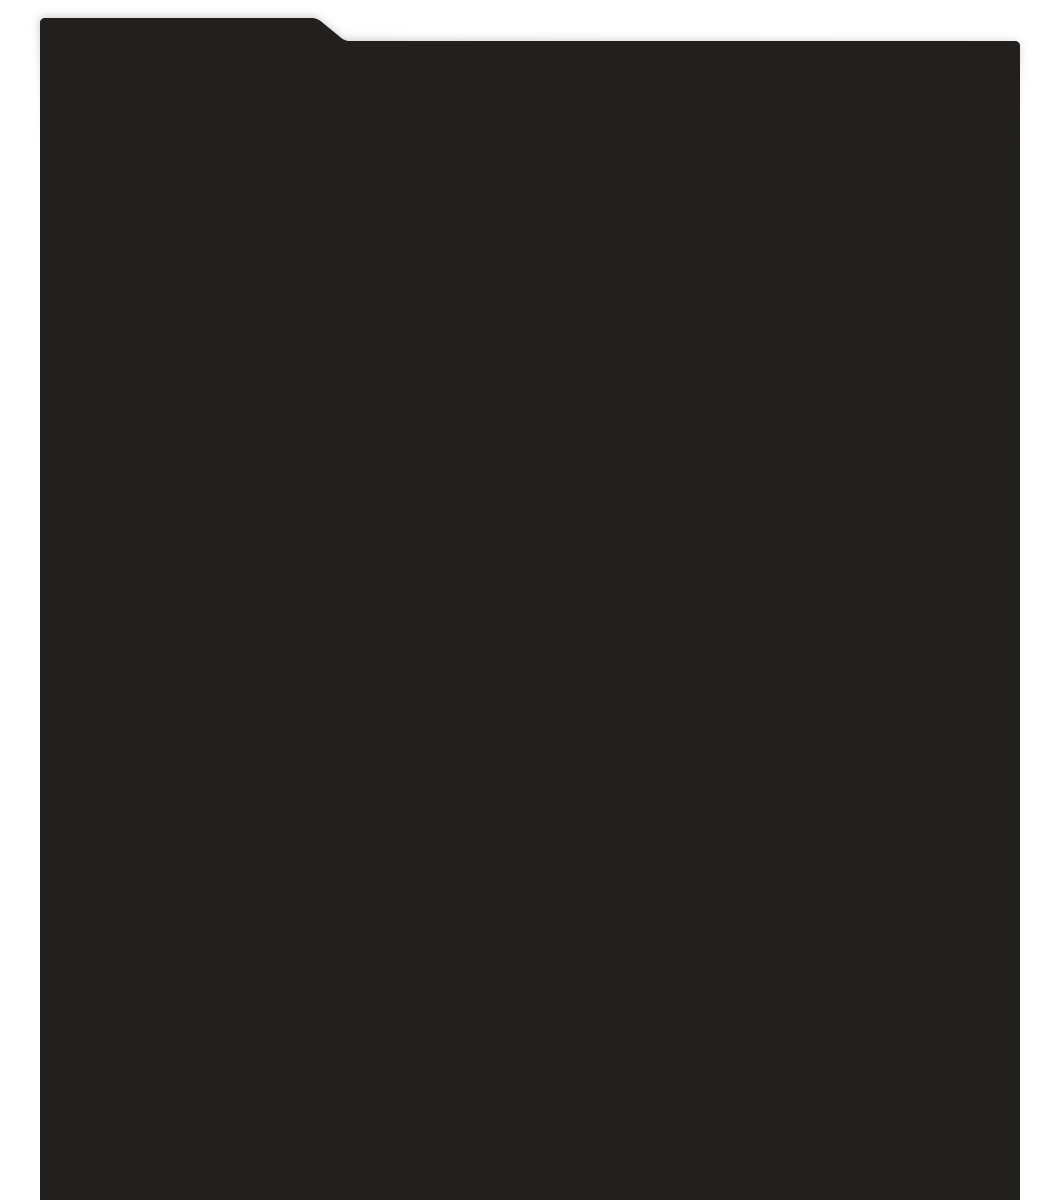
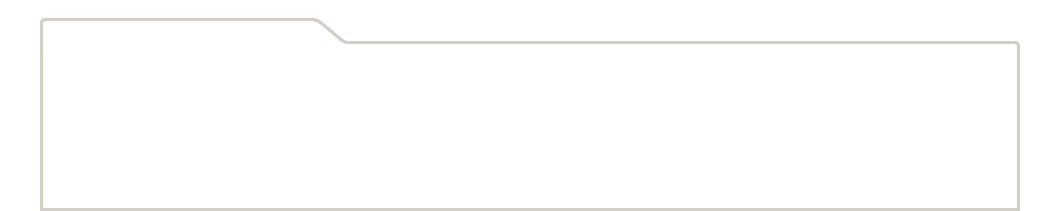
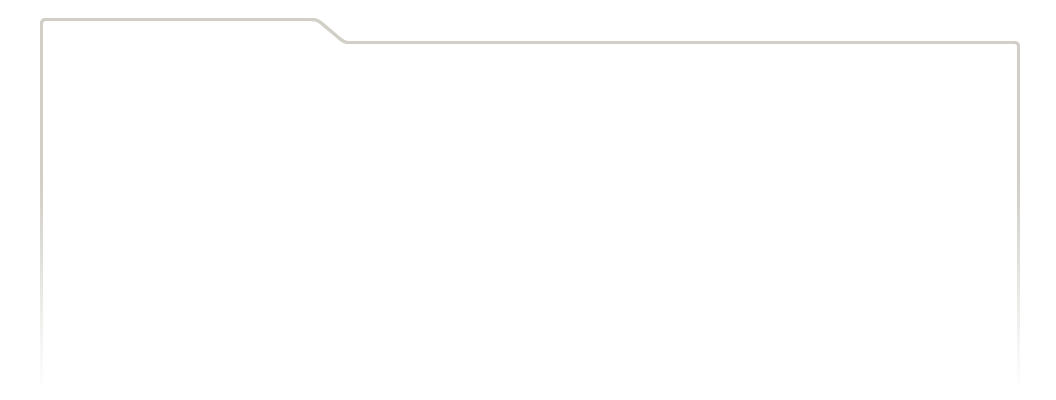
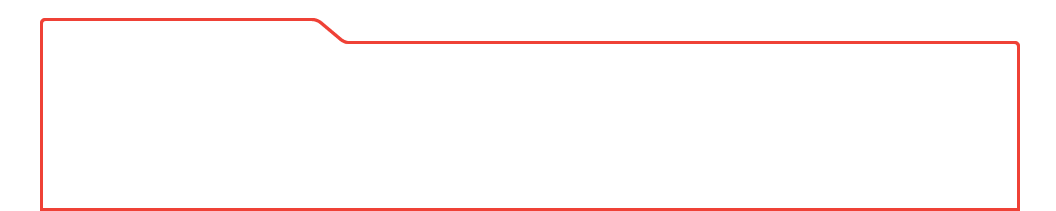
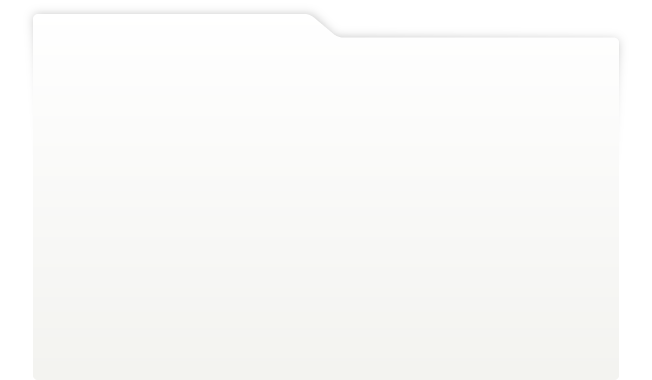
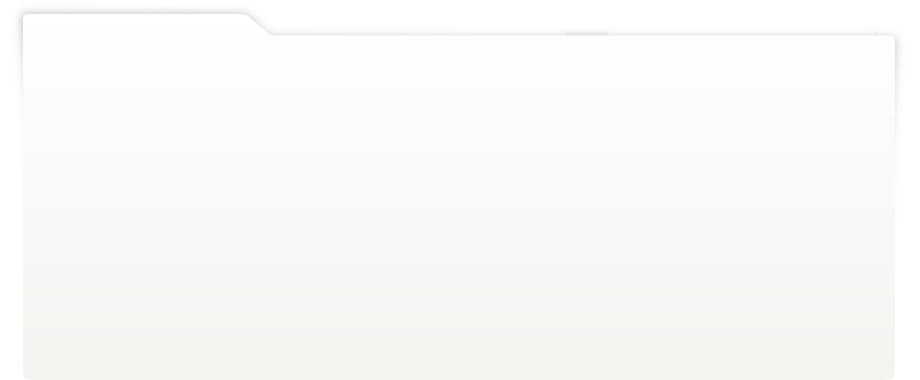
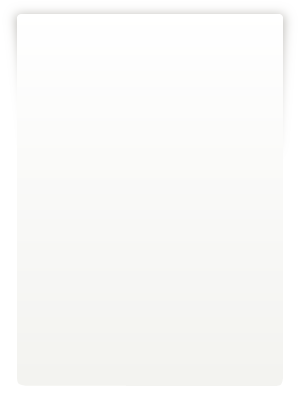
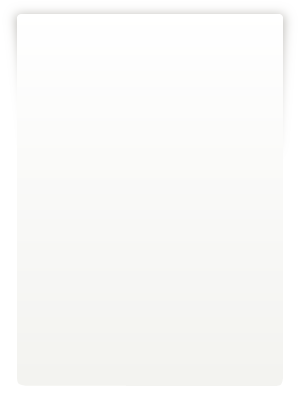
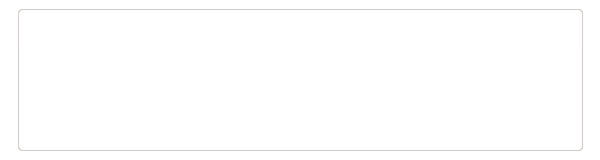
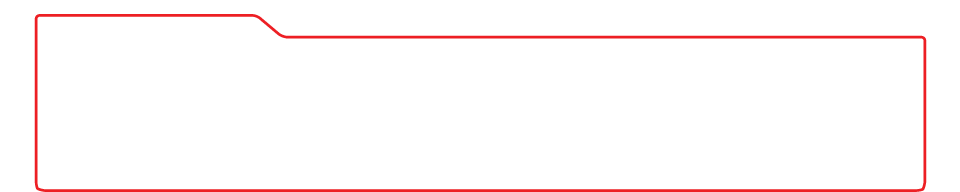
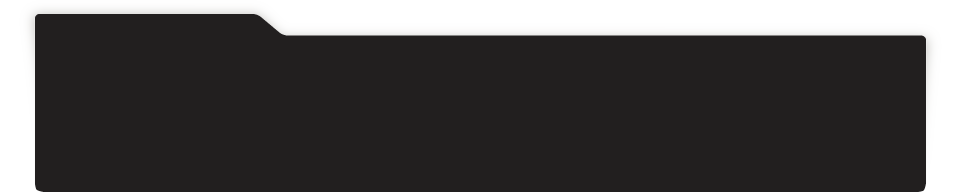
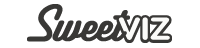
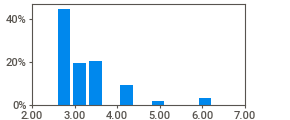
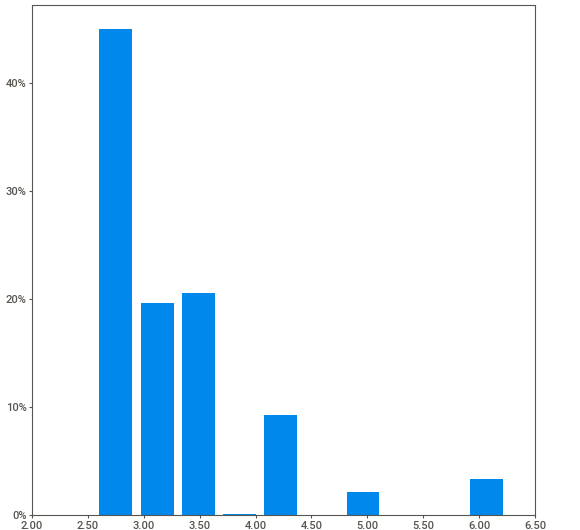
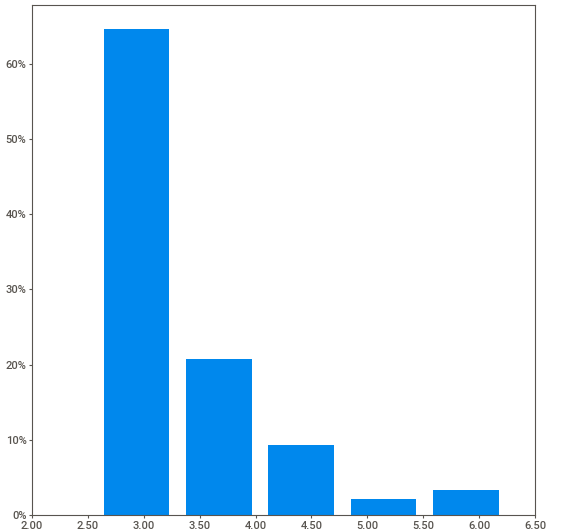
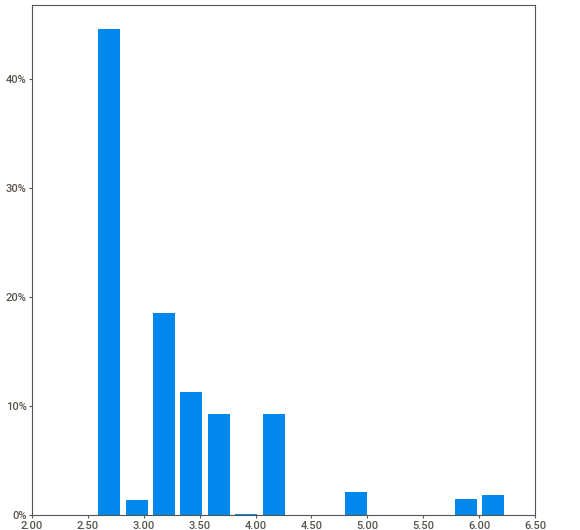
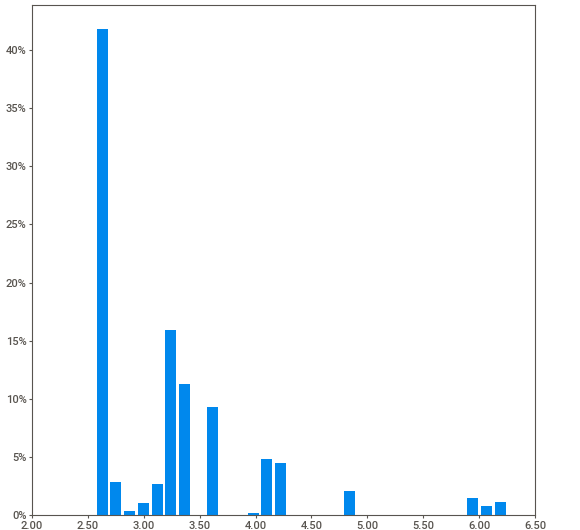
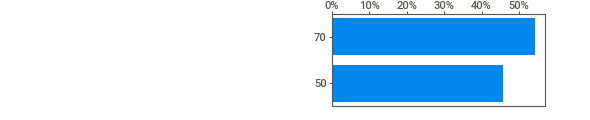
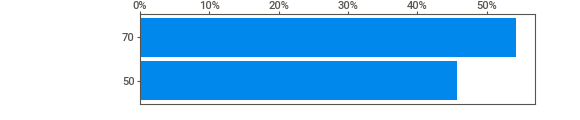
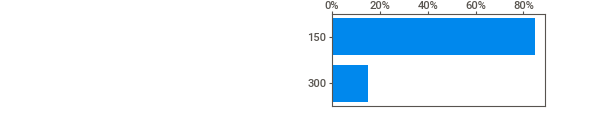
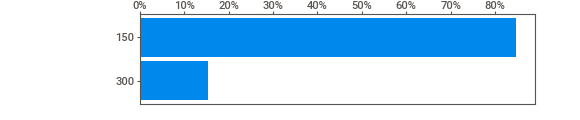
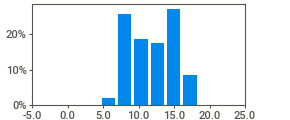
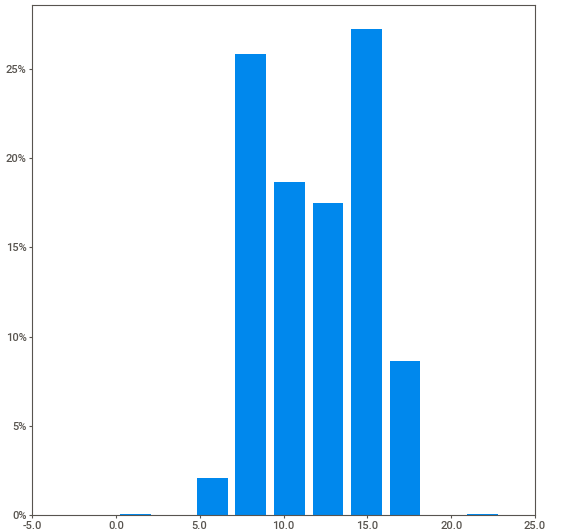
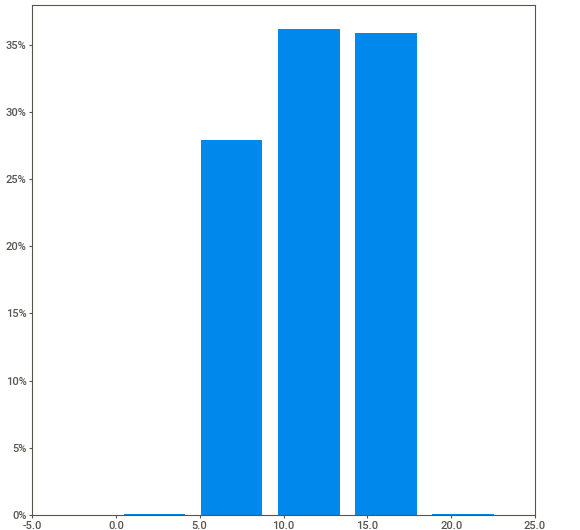
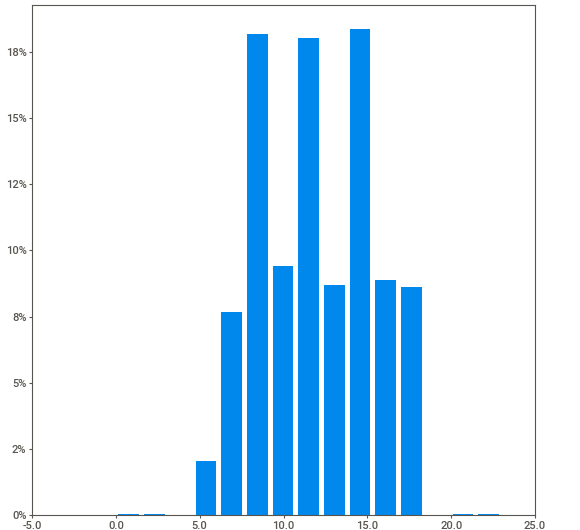
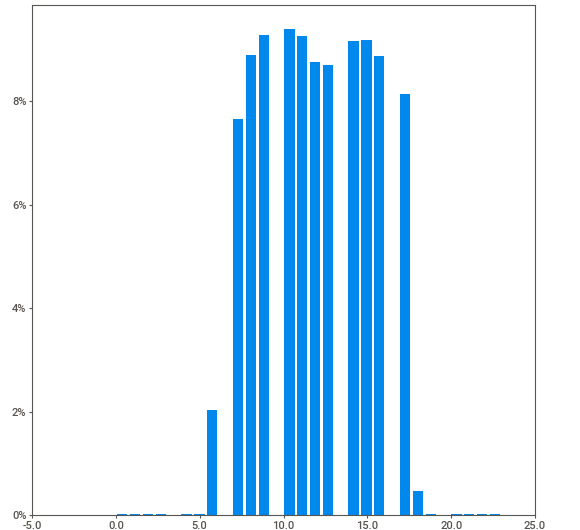
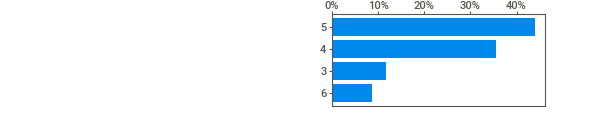
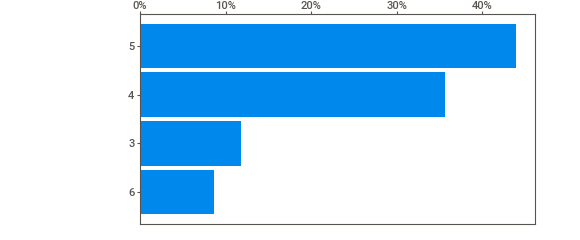
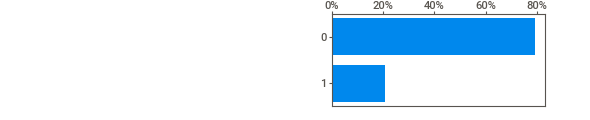
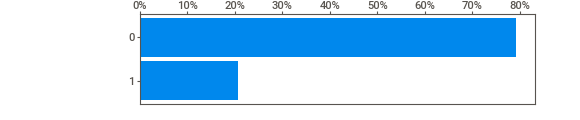
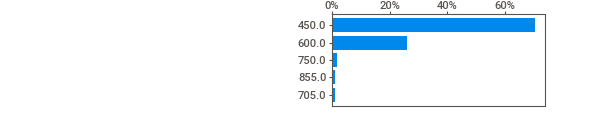
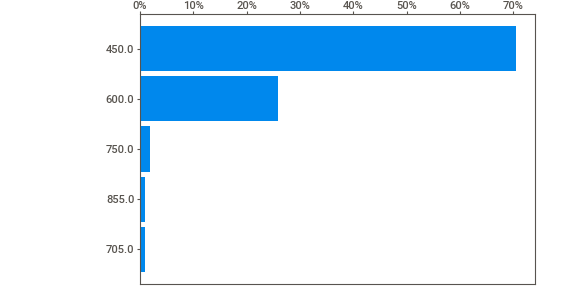
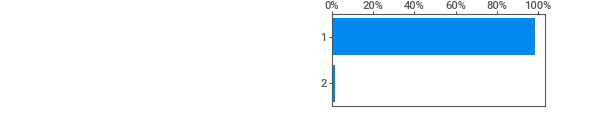
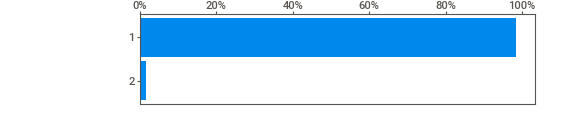
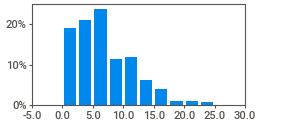
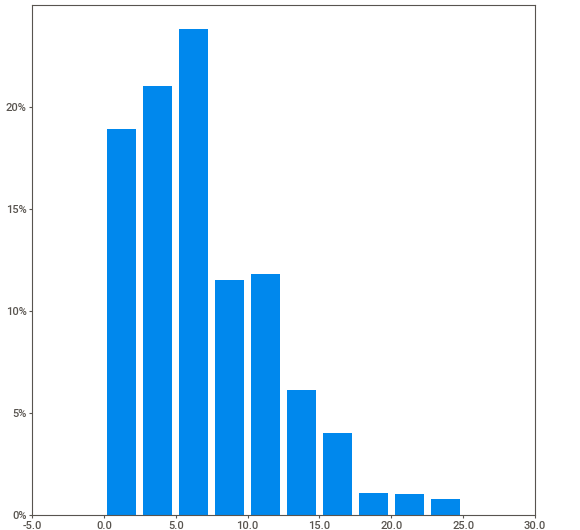
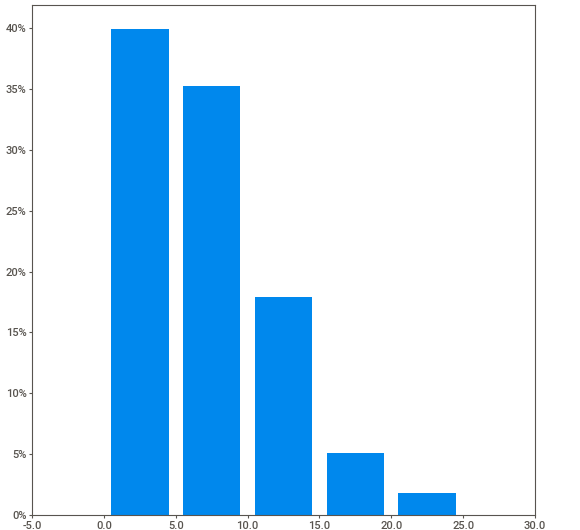
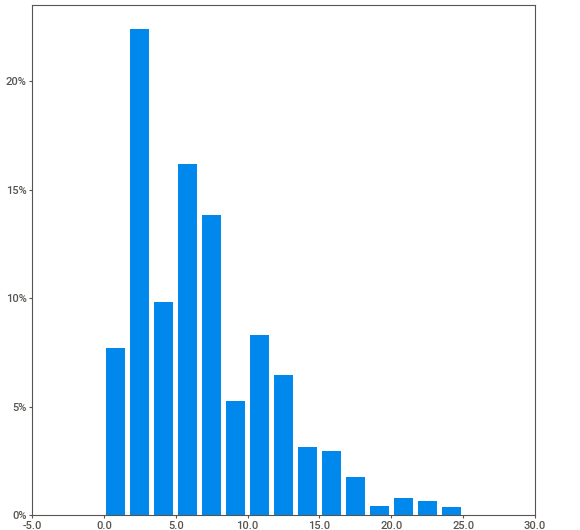
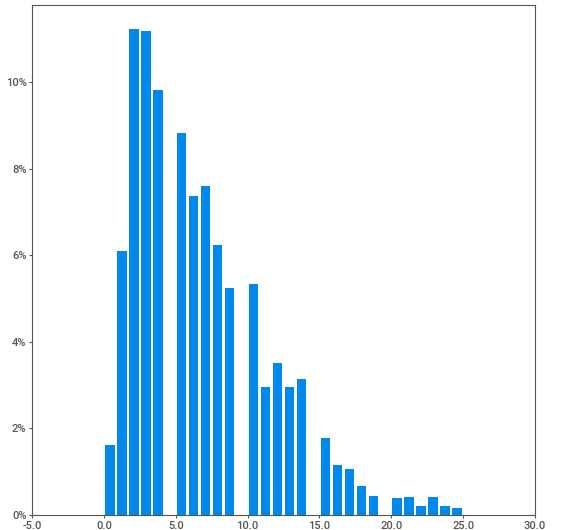
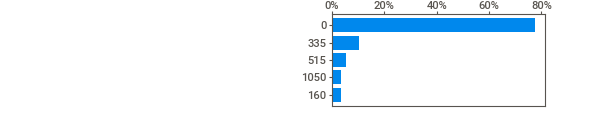
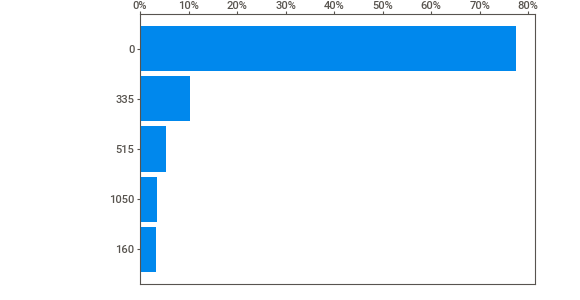
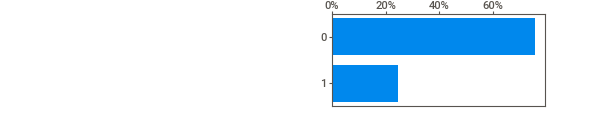
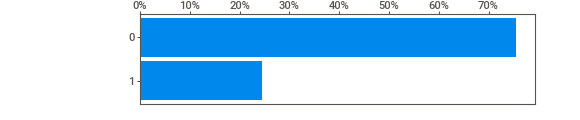
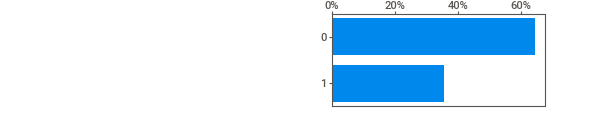
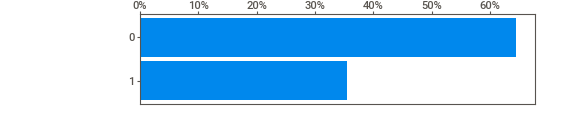
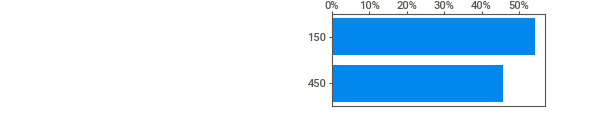
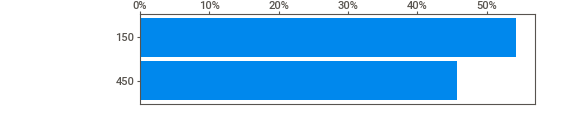
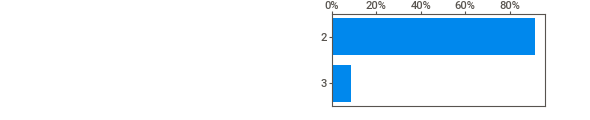
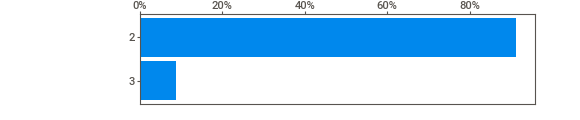
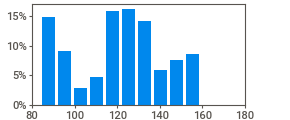
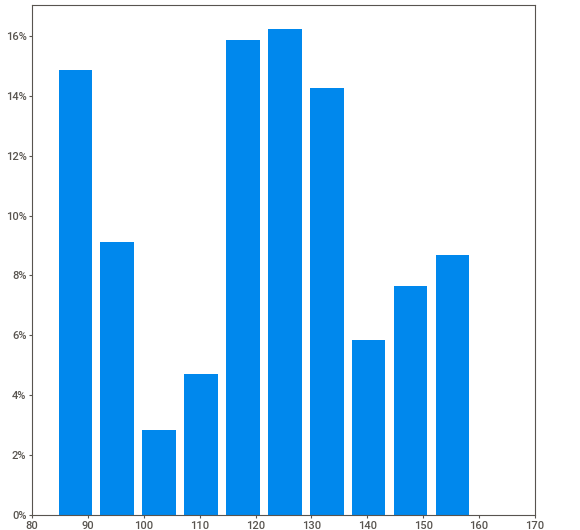
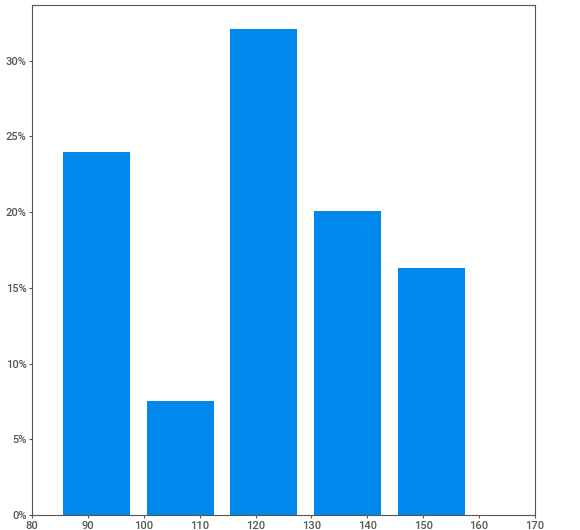
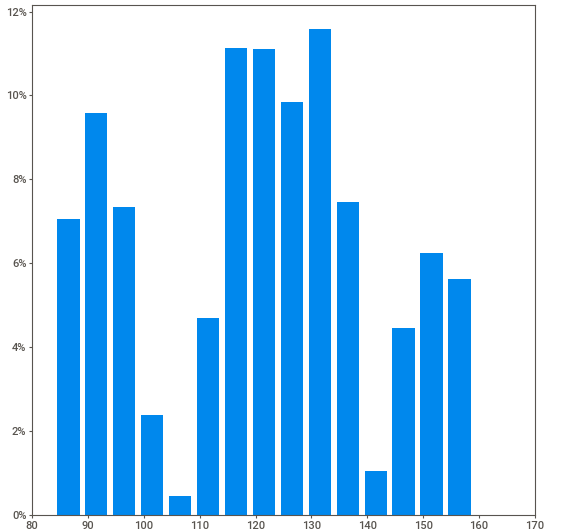
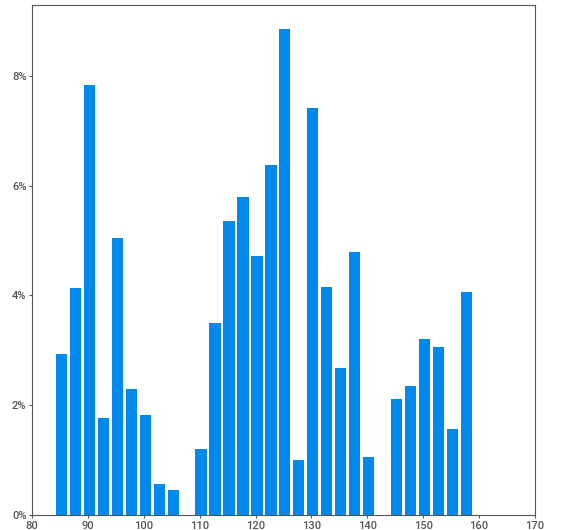
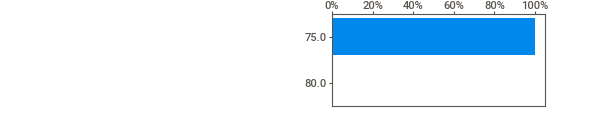
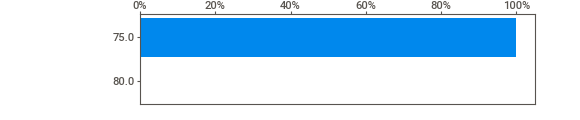
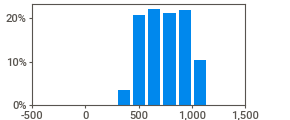
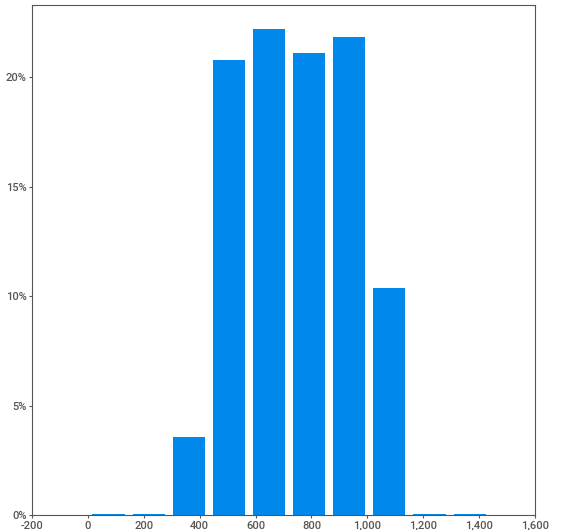
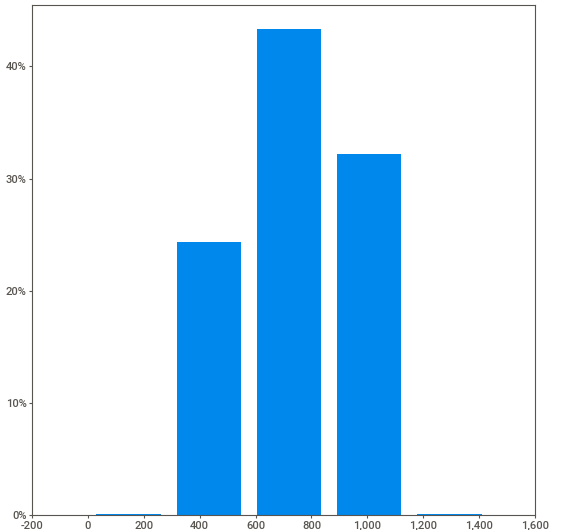
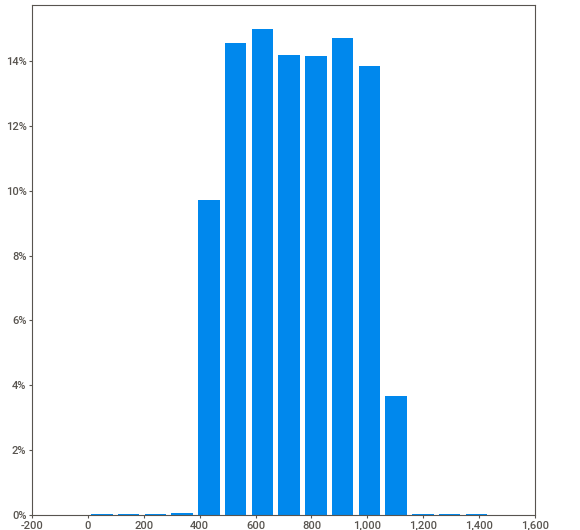
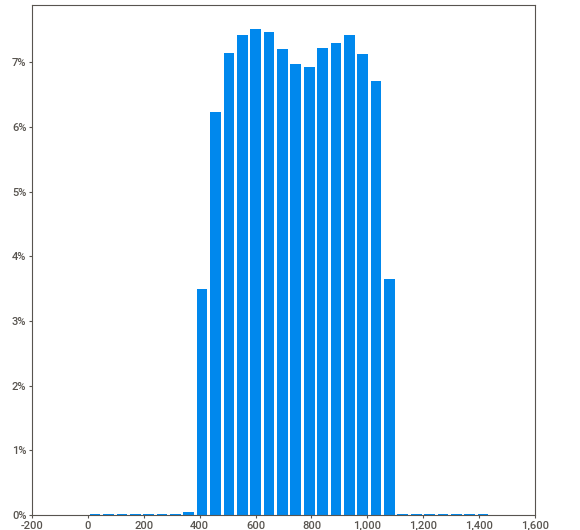
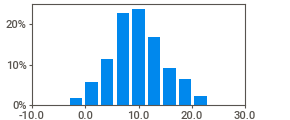
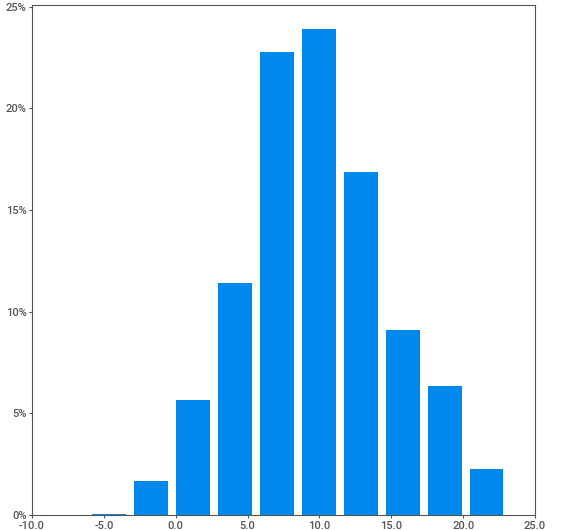
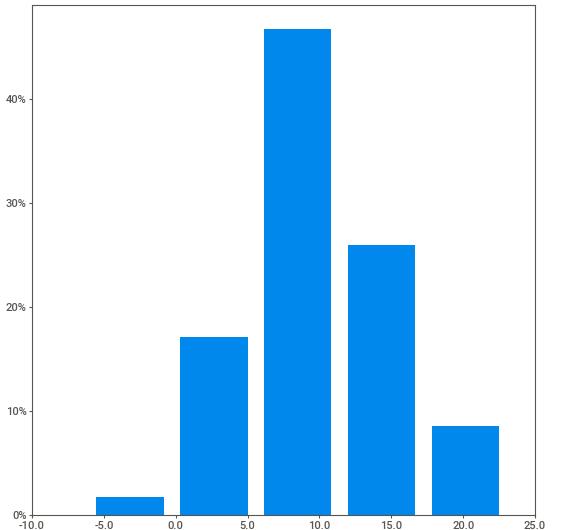
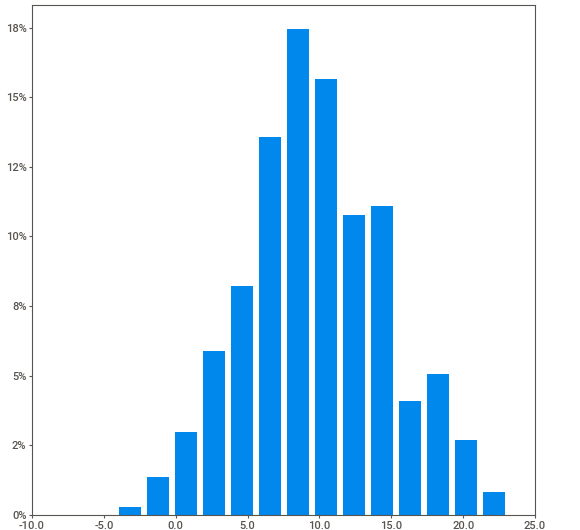
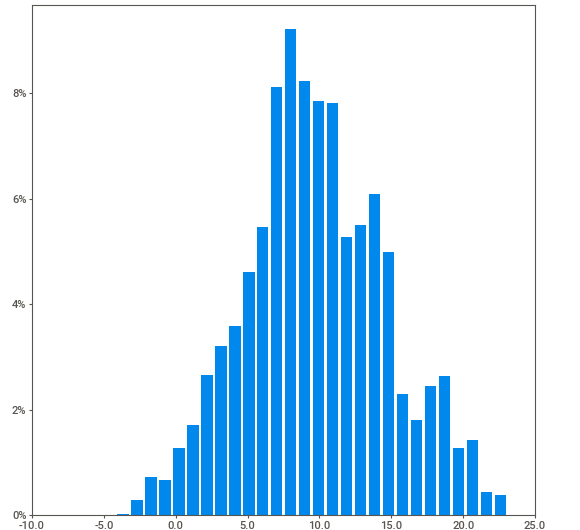
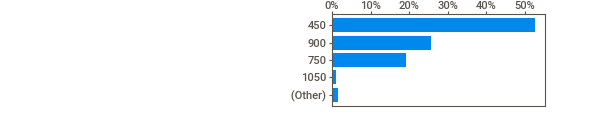
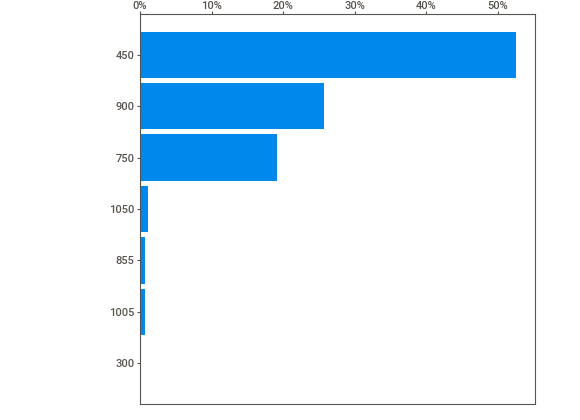
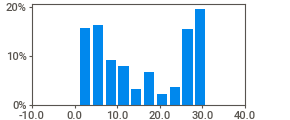
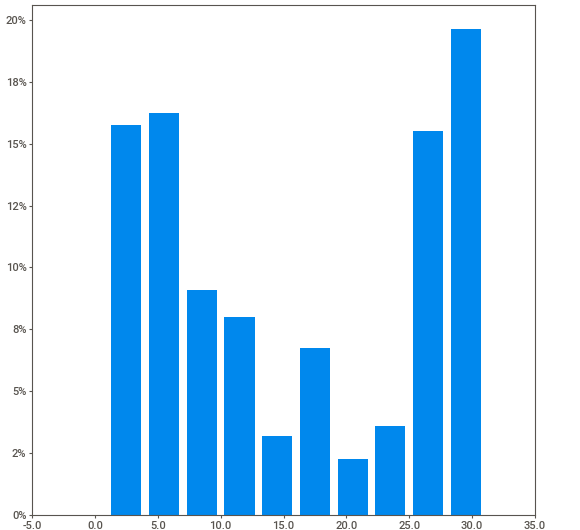
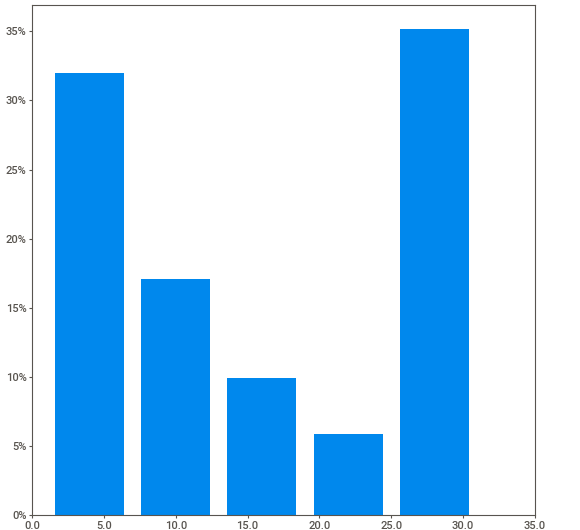
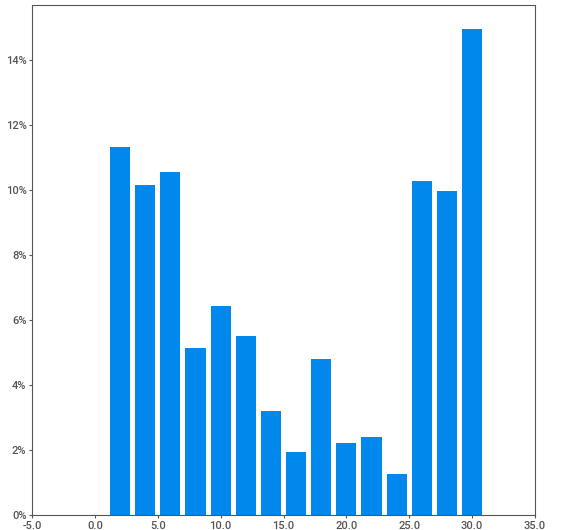
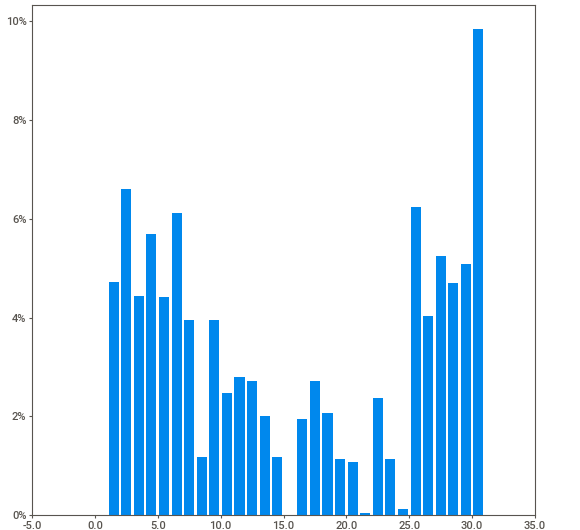
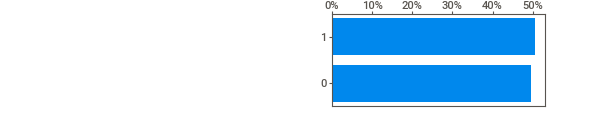
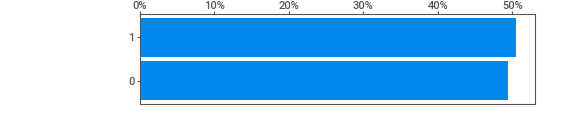
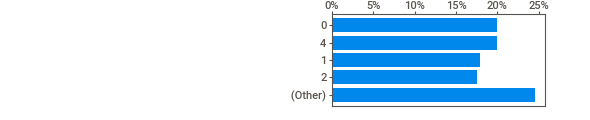
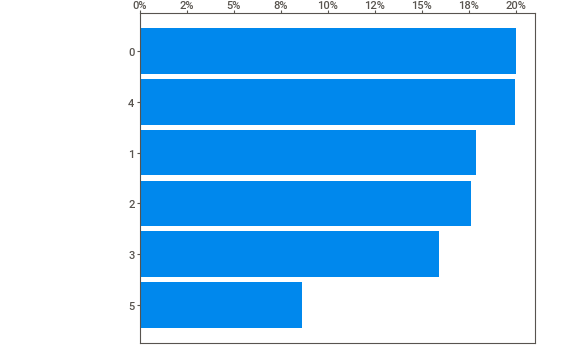
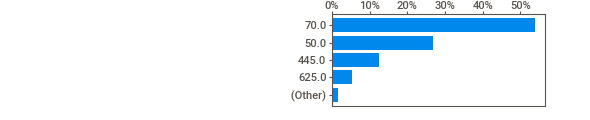
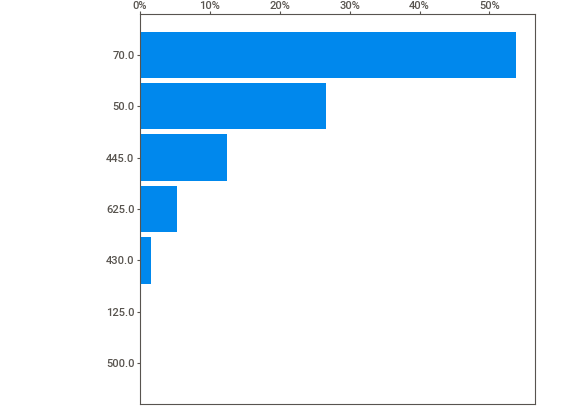
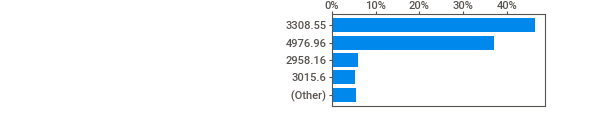
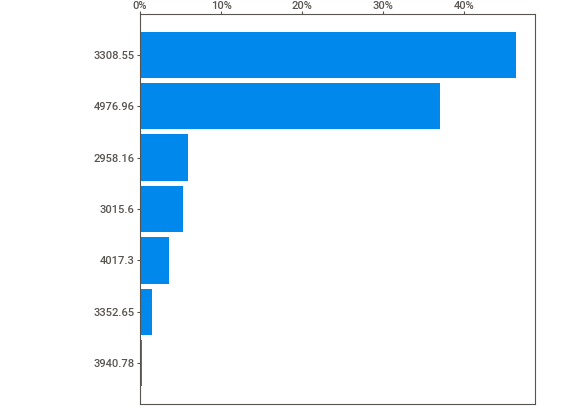
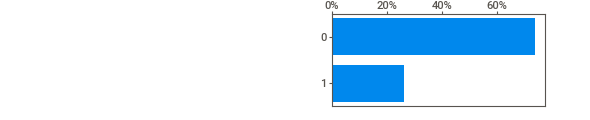
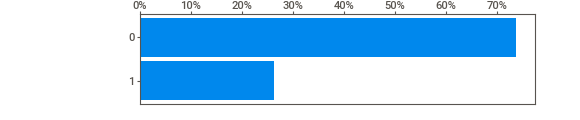
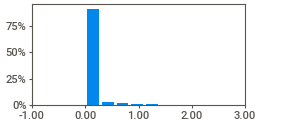
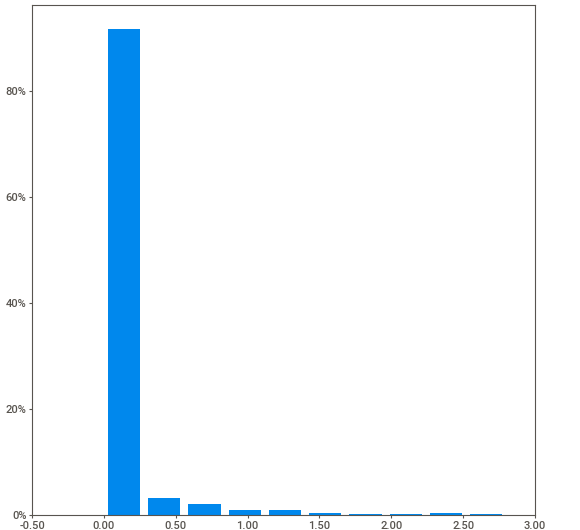
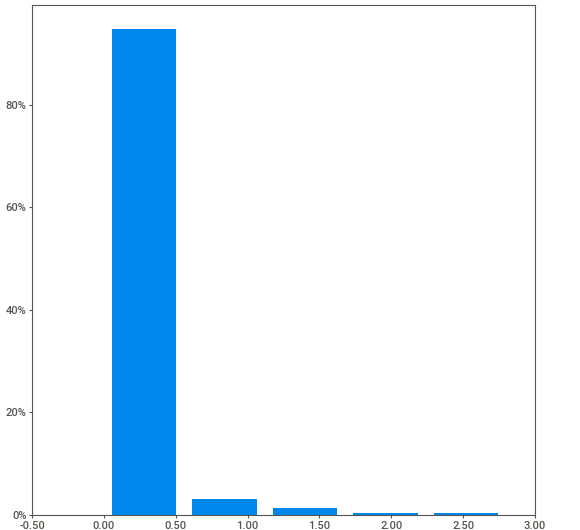
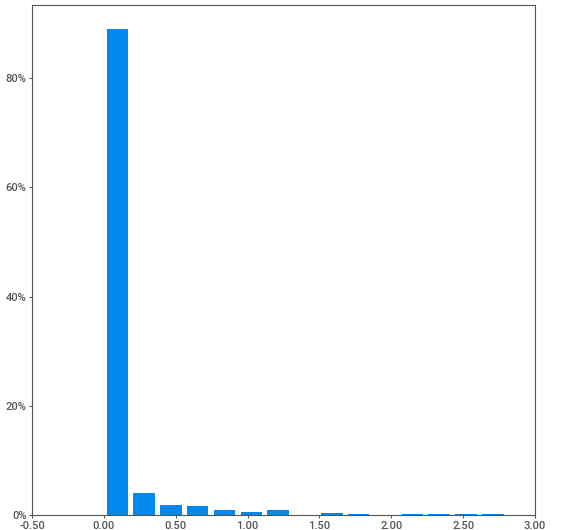
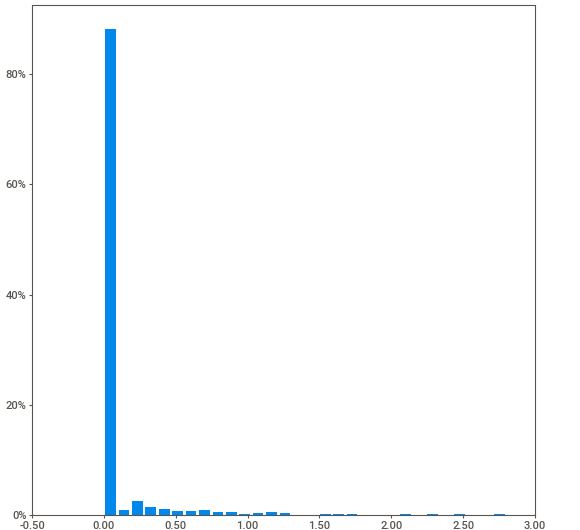
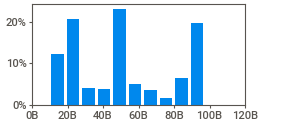
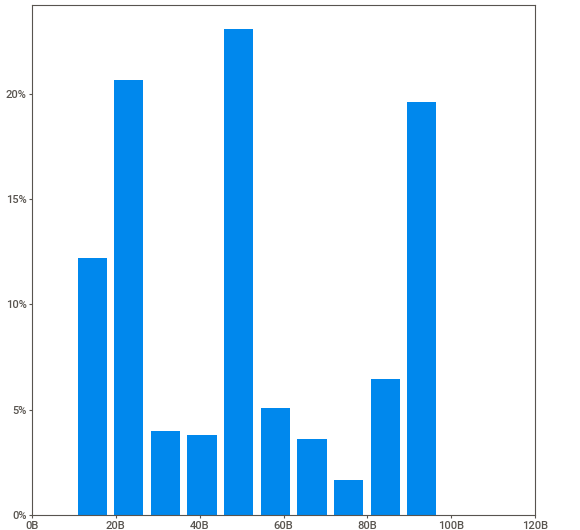
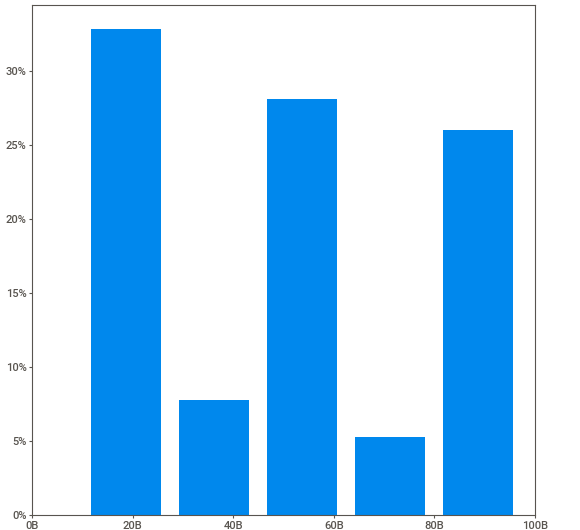
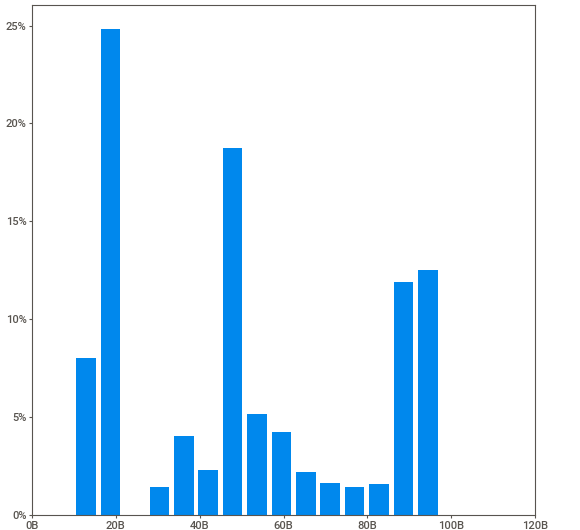
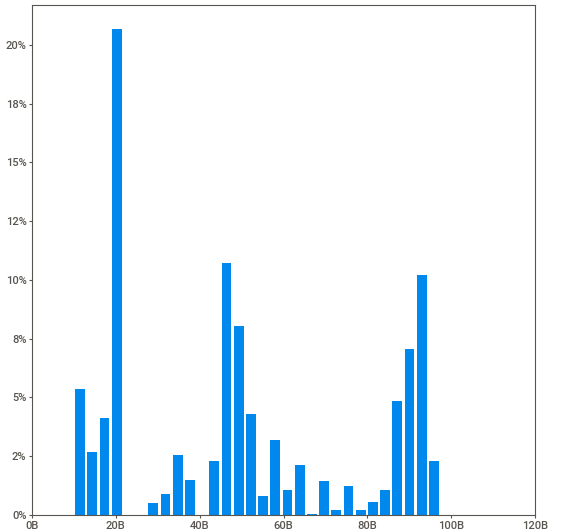
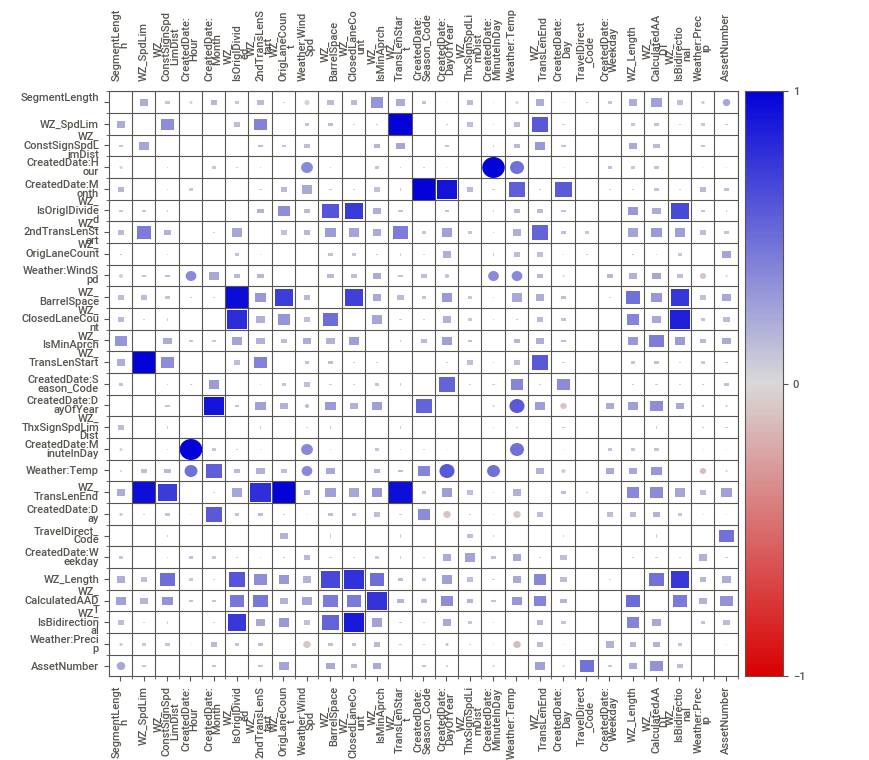
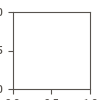

Report 'sweetviz_report.html' was saved to storage.


In [19]:
import sweetviz as sv

eda_report = sv.analyze(df_selected)
eda_report.show_notebook(filepath='sweetviz_report.html')

# Box plot

In [25]:
df_numeric = df_numeric.drop(
    columns=['WZ_OrigLaneCount', 'WZ_IsOrigIDivided', 'WZ_ClosedLaneCount', 'WZ_IsMinAprch', 'WZ_IsBidirectional',
             'TravelDirect_Code', 'CreatedDate:Season_Code'])

In [26]:
df_numeric = df_numeric.drop(columns=['BaselineTime', 'DelayTime'])

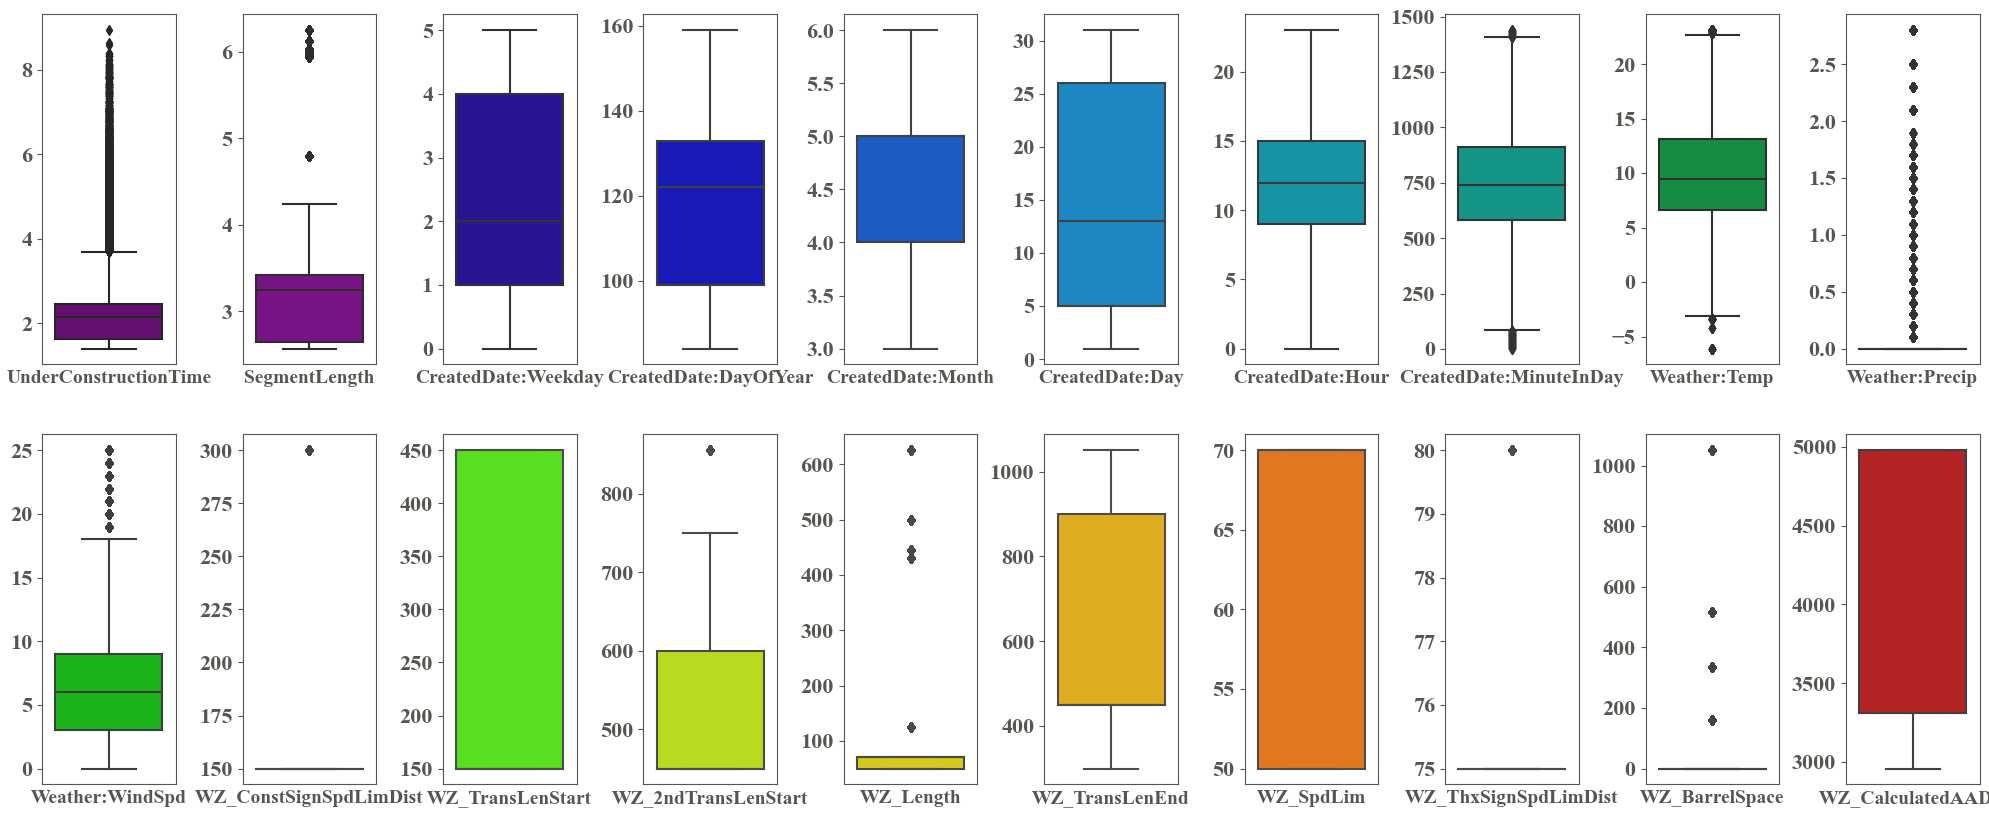

In [78]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'

num_rows = 2
fig, ax = plt.subplots(num_rows, len(df_numeric.columns) // num_rows, figsize=(25, 10))
plt.subplots_adjust(wspace=0.5)
colors = sns.color_palette('nipy_spectral', len(df_numeric.columns))

for i, column in enumerate(df_numeric.columns):
    row = i // (len(df_numeric.columns) // num_rows)
    col = i % (len(df_numeric.columns) // num_rows)
    sns.boxplot(data=df_numeric[column], ax=ax[row, col], color=colors[i])
    ax[row, col].set_xlabel(column)
    ax[row, col].set_xticks([])

plt.show()
fig.savefig(os.path.join(output_root_path, 'box_plots.svg'))
fig.savefig(os.path.join(output_root_path, 'box_plots.png'))